### ДЗ4 Оцениваемое

#### Задание 1
Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

In [1]:
from string import punctuation
import nltk
from nltk import WordNetLemmatizer
import json
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot') #зададим стиль

In [2]:
read_path = 'C:\\Users\\Нелли\\Harry_Potter_and_the_Sorcerers_Stone.txt'
f = open(read_path, 'r', encoding='utf-8') #считываем текст из файла
text = f.read()

Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

Text(0,0.5,'Относительная частота')

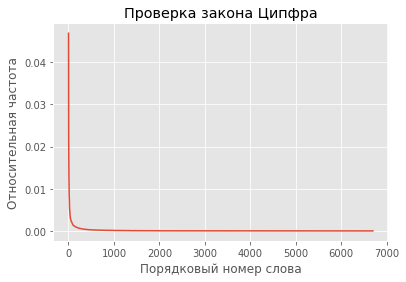

In [3]:
punctuation += "« » —" #добавляем необходимую для удаления пунктуацию 
new_text = [w.strip(punctuation) for w in text.split()] #очищаем текст от пунктуации
united_line = ' '.join(new_text) #объединяем текст в строку
wnl = WordNetLemmatizer() #лемматизируем текст
lemmatized_text_hp = wnl.lemmatize(united_line.lower())
with open('lemmatized_text_hp.json', 'w', encoding='utf-8') as f:
    json.dump(lemmatized_text_hp, f, ensure_ascii=False) #записываем лемматизированный текст в файл
graph_data = Counter(lemmatized_text_hp.split()) #считаем частотность слов
total_words = len(lemmatized_text_hp.split()) #считаем общее количество слов в тексте
rang_dict = {(i+1):x[1] / total_words for i, x in enumerate(graph_data.most_common())} #создаем словарь, где ключ это ранг слова (начиная с единцы), а значение - относительная частотность (ennumerate нумерует каждую итерацию цикла и записывает ее в переменную i)
plt.plot(rang_dict.keys(), rang_dict.values()) #строим линейную диаграмму
plt.title('Проверка закона Ципфра') #запишем название графика
plt.xlabel('Порядковый номер слова') #назовем ось x
plt.ylabel('Относительная частота') #назовем ось y

Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

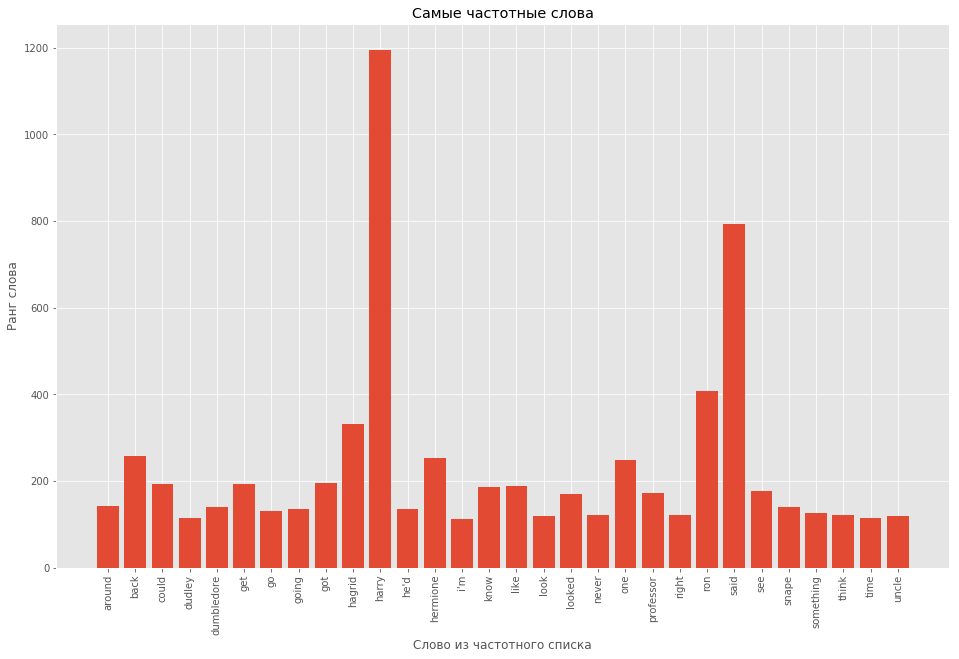

In [4]:
sw = stopwords.words('english') #импортируем стоп-слова
filtered = [w for w in lemmatized_text_hp.split() if w not in sw] #очищаем лемматизированный текст от стоп-слов
top_words = Counter(filtered).most_common(30) #считаем 30 самых частотных слов
plt.figure(figsize=(16, 10)) #увеличиваем график
plt.bar([x[0] for x in top_words], [x[1] for x in top_words]) #строим барплот, по оси x 30 наиболее частотных слов, а по оси y - ранг слова
plt.xticks(rotation='vertical') #делаем подписи по оси x вертикальными
plt.title('Самые частотные слова') #запишем название графика
plt.xlabel('Слово из частотного списка') #назовем ось x
plt.ylabel('Ранг слова') #назовем ось y
plt.show()